# Taxonomy 정의

이 노트북은 아이콘 데이터셋의 coarse / fine taxonomy 정의와 분포를 확인합니다.

## 개요

- 입력:
  - `dataset/icons/taxonomy_coarse.csv`
  - `dataset/icons/taxonomy_fine.csv`
  - `dataset/icons/stage1_classes.txt`
  - `dataset/icons/stage2_classes.txt`
- 출력/역할:
  - coarse / fine 클래스 수 및 분포 확인
  - coarse ↔ fine 관계 표
  - 추후 모델/라벨링에서 참조할 기준 정보 시각화

**원본 노트북**: `01_taxonomy_definition.ipynb`


In [3]:
import os
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

BASE_DIR = Path.cwd()
DATA_DIR = BASE_DIR / "dataset" / "icons"

print("BASE_DIR :", BASE_DIR)
print("DATA_DIR :", DATA_DIR)


BASE_DIR : /home/wsm/workspace/hit-archlens-project
DATA_DIR : /home/wsm/workspace/hit-archlens-project/dataset/icons


In [4]:
tax_coarse_path = DATA_DIR / "taxonomy_coarse.csv"
tax_fine_path = DATA_DIR / "taxonomy_fine.csv"
stage1_path = DATA_DIR / "stage1_classes.txt"
stage2_path = DATA_DIR / "stage2_classes.txt"

df_coarse = pd.read_csv(tax_coarse_path)
df_fine = pd.read_csv(tax_fine_path)

stage1_classes = stage1_path.read_text(encoding="utf-8").splitlines()
stage2_classes = stage2_path.read_text(encoding="utf-8").splitlines()

print("coarse taxonomy shape :", df_coarse.shape)
print("fine taxonomy shape   :", df_fine.shape)
print("stage1 coarse classes :", len(stage1_classes))
print("stage2 fine classes   :", len(stage2_classes))

df_coarse.head(), df_fine.head()

coarse taxonomy shape : (19, 2)
fine taxonomy shape   : (64, 3)
stage1 coarse classes : 19
stage2 fine classes   : 64


(              coarse_class  num_icons_fine
 0    AI & Machine Learning              41
 1                Analytics              45
 2  Application Integration              20
 3               Blockchain               5
 4    Business Applications              38,
             coarse_class canonical_service_name  num_icons
 0  AI & Machine Learning      amazon comprehend          8
 1  AI & Machine Learning     amazon rekognition          6
 2  AI & Machine Learning       amazon sagemaker         22
 3  AI & Machine Learning        amazon textract          5
 4              Analytics          amazon athena          5)

In [5]:
df_coarse_sorted = df_coarse.sort_values("num_icons_fine", ascending=False).reset_index(drop=True)
df_coarse_sorted


,coarse_class,num_icons_fine
0,Storage,87
1,Database,71
2,Networking,61
3,Analytics,45
4,Compute,42
5,Management & Governance,42
6,AI & Machine Learning,41
7,IoT,39
8,Business Applications,38
9,Migration & Transfer,28


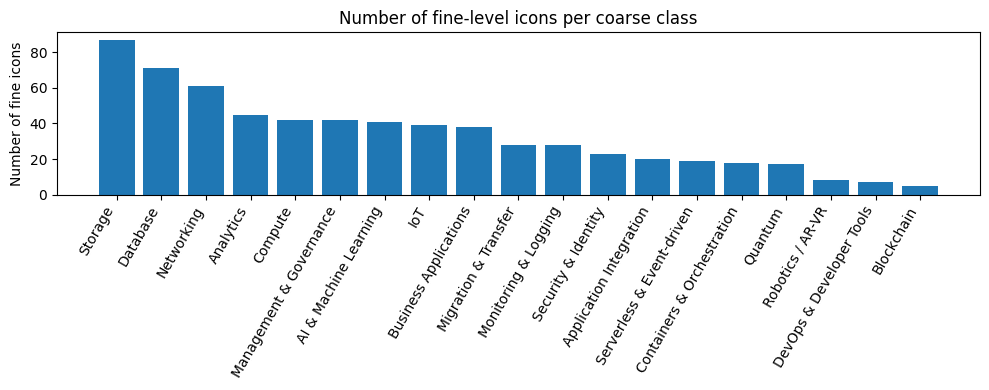

In [6]:
plt.figure(figsize=(10, 4))
plt.bar(df_coarse_sorted["coarse_class"], df_coarse_sorted["num_icons_fine"])
plt.xticks(rotation=60, ha="right")
plt.ylabel("Number of fine icons")
plt.title("Number of fine-level icons per coarse class")
plt.tight_layout()
plt.show()

In [7]:
# coarse_class, canonical_service_name, num_icons
df_fine_sorted = df_fine.sort_values(["coarse_class", "canonical_service_name"]).reset_index(drop=True)
df_fine_sorted.head(20)

,coarse_class,canonical_service_name,num_icons
0,AI & Machine Learning,amazon comprehend,8
1,AI & Machine Learning,amazon rekognition,6
2,AI & Machine Learning,amazon sagemaker,22
3,AI & Machine Learning,amazon textract,5
4,Analytics,amazon athena,5
5,Analytics,amazon emr,7
6,Analytics,amazon opensearch service,11
7,Analytics,amazon quicksight,5
8,Analytics,aws glue,12
9,Analytics,aws lake formation,5


In [8]:
coarse_example = "Storage"  # 다른 coarse로 바꿔보면서 탐색
df_fine_example = df_fine_sorted[df_fine_sorted["coarse_class"] == coarse_example]
df_fine_example

,coarse_class,canonical_service_name,num_icons
59,Storage,amazon efs,9
60,Storage,amazon fsx,22
61,Storage,amazon s3,25
62,Storage,aws backup,21
63,Storage,aws storage gateway,10


In [9]:
top_n = 20
df_fine_top = df_fine_sorted.sort_values("num_icons", ascending=False).head(top_n)
df_fine_top

,coarse_class,canonical_service_name,num_icons
61,Storage,amazon s3,25
18,Compute,amazon ec2,23
47,Networking,amazon vpc,23
2,AI & Machine Learning,amazon sagemaker,22
60,Storage,amazon fsx,22
62,Storage,aws backup,21
37,Management & Governance,aws systems manager,20
24,Database,amazon aurora,18
52,Quantum,amazon braket,17
43,Monitoring & Logging,amazon cloudwatch,15


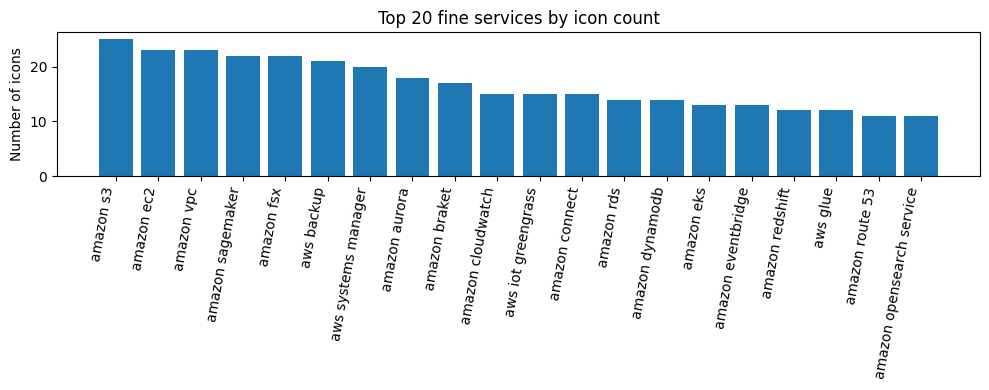

In [10]:
plt.figure(figsize=(10, 4))
plt.bar(df_fine_top["canonical_service_name"], df_fine_top["num_icons"])
plt.xticks(rotation=80, ha="right")
plt.ylabel("Number of icons")
plt.title(f"Top {top_n} fine services by icon count")
plt.tight_layout()
plt.show()